# Exploration et Visualisation de données avec Matplotlib et Pandas

## Crédits :
Esteban MARTEL  
Lucas BLANC  
Arthur ANNARUMMA  
Baptisme BILLA  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
data = pd.read_csv('data.csv', sep=';')
data.head()

,annee,UAI,libelle,region,dont_apprentis_eple,taux_poursuite_etudes,taux_emploi_6_mois,taux_emploi_6_mois_attendu,va_emploi_6_mois,taux_emploi_12_mois,taux_emploi_18_mois,taux_emploi_24_mois,Part en poursuite d'études,Part en emploi 6 mois après la sortie,Part des autres situations
0,cumul 2019-2020,0011010T,Lycée professionnel du Bugey,AUVERGNE-RHONE-ALPES,ensemble,44.0,34.0,32.0,2.0,38.0,NaN,NaN,NaN,NaN,NaN
1,cumul 2019-2020,0020050U,Lycée d'enseignement général et technologique ...,HAUTS-DE-FRANCE,dont apprentis,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cumul 2019-2020,0020052W,Lycée professionnel Colard Noël - Lycée des mé...,HAUTS-DE-FRANCE,dont élèves en voie pro sco,49.0,26.0,25.0,1.0,32.0,NaN,NaN,NaN,NaN,NaN
3,cumul 2019-2020,0020078Z,Lycée professionnel Julie Daubie,HAUTS-DE-FRANCE,dont élèves en voie pro sco,49.0,15.0,22.0,-7.0,24.0,NaN,NaN,NaN,NaN,NaN
4,cumul 2019-2020,0060027X,Lycée professionnel Pierre et Marie Curie - Ly...,PROVENCE-ALPES-COTE D'AZUR,dont élèves en voie pro sco,41.0,20.0,31.0,-11.0,28.0,NaN,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['annee', 'UAI', 'libelle', 'region', 'dont_apprentis_eple',
       'taux_poursuite_etudes', 'taux_emploi_6_mois',
       'taux_emploi_6_mois_attendu', 'va_emploi_6_mois', 'taux_emploi_12_mois',
       'taux_emploi_18_mois', 'taux_emploi_24_mois',
       'Part en poursuite d'études', 'Part en emploi 6 mois après la sortie',
       'Part des autres situations'],
      dtype='object')

In [4]:
data.describe()

,taux_poursuite_etudes,taux_emploi_6_mois,taux_emploi_6_mois_attendu,va_emploi_6_mois,taux_emploi_12_mois,taux_emploi_18_mois,taux_emploi_24_mois,Part en poursuite d'études,Part en emploi 6 mois après la sortie,Part des autres situations
count,12847.000000,12000.000000,12001.000000,11732.000000,12001.000000,3932.000000,3932.000000,4415.000000,4385.000000,4385.000000
mean,44.623648,43.743167,43.648779,0.095636,51.566286,51.842574,56.358596,46.915742,23.739567,29.308096
std,12.279015,15.238861,12.969383,6.431549,14.613314,13.456182,13.068965,11.617552,12.012317,9.292303
min,0.000000,2.000000,2.000000,-12.000000,3.000000,6.000000,8.000000,0.000000,0.000000,0.000000
25%,38.000000,33.000000,34.000000,-4.000000,41.000000,43.000000,48.000000,40.000000,15.000000,23.000000
50%,46.000000,43.000000,42.000000,0.000000,51.000000,51.000000,56.000000,48.000000,21.000000,29.000000
75%,52.000000,54.000000,53.000000,5.000000,61.000000,61.000000,65.000000,54.000000,30.000000,35.000000
max,100.000000,100.000000,88.000000,12.000000,100.000000,100.000000,100.000000,100.000000,85.000000,90.000000


In [6]:
data['annee'] = pd.Categorical(data['annee'], categories=data['annee'].unique(), ordered=True)
periodes = data['annee'].unique()

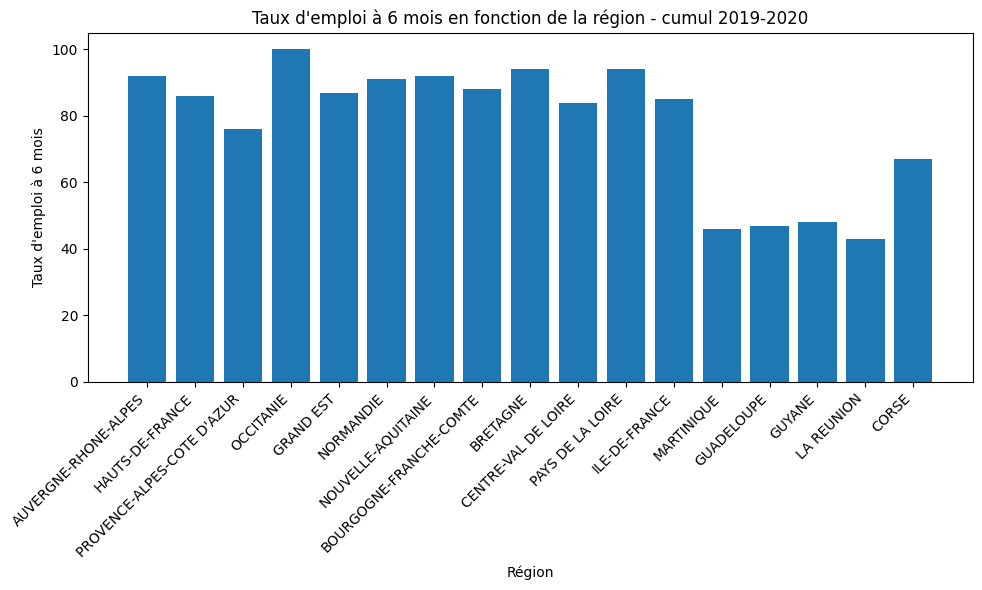

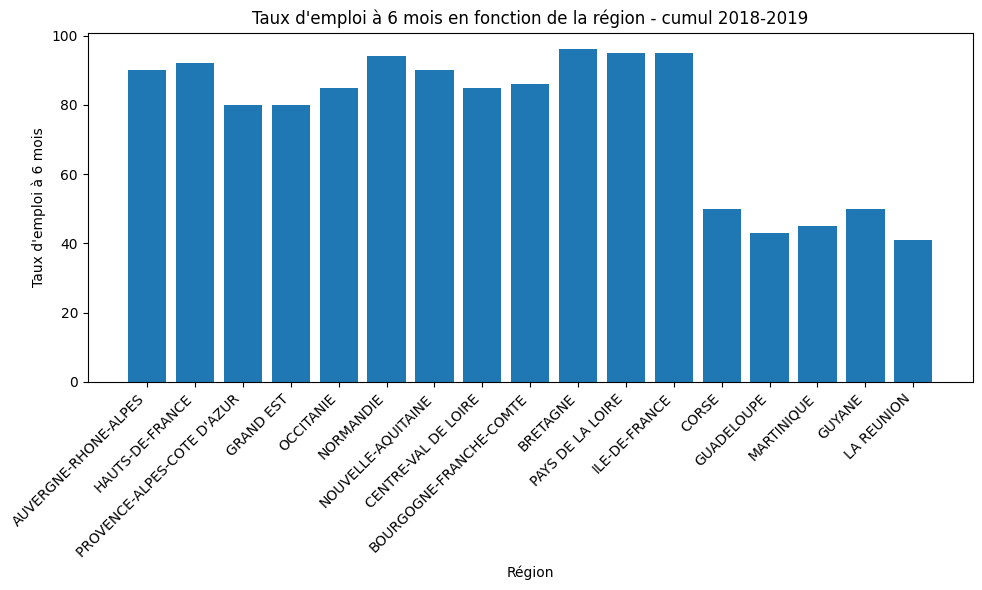

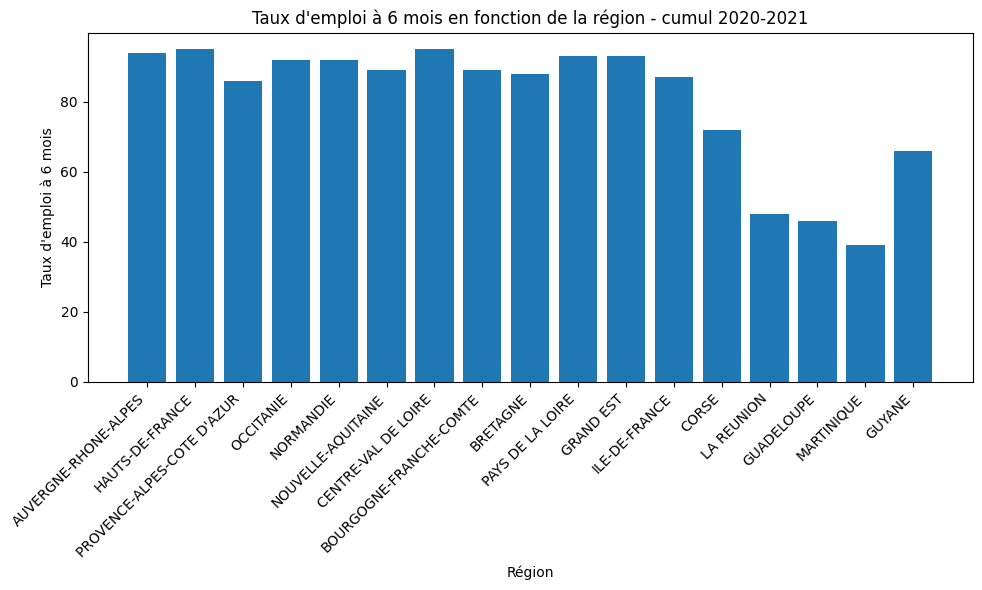

In [7]:
for periode in periodes:
    subset_data = data[data['annee'] == periode]
    
    plt.figure(figsize=(10, 6))
    plt.bar(subset_data['region'], subset_data['taux_emploi_6_mois'])
    plt.title(f"Taux d'emploi à 6 mois en fonction de la région - {periode}")
    plt.xlabel('Région')
    plt.ylabel('Taux d\'emploi à 6 mois')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

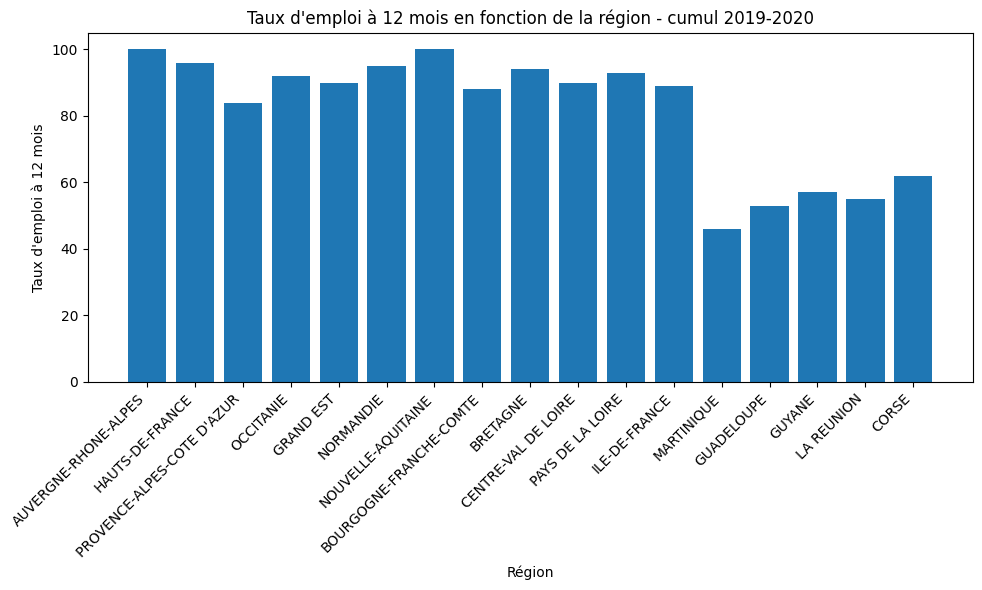

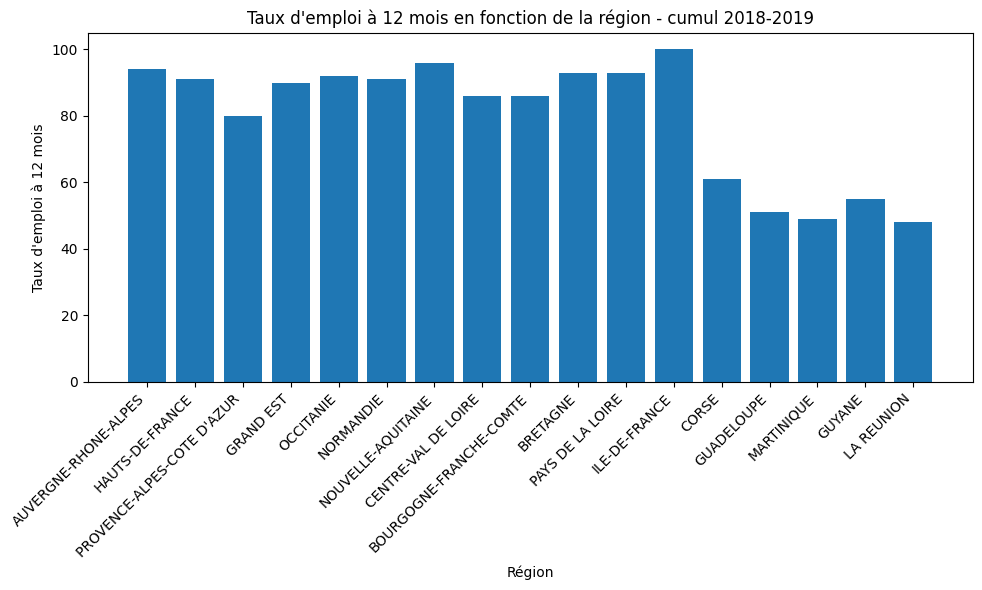

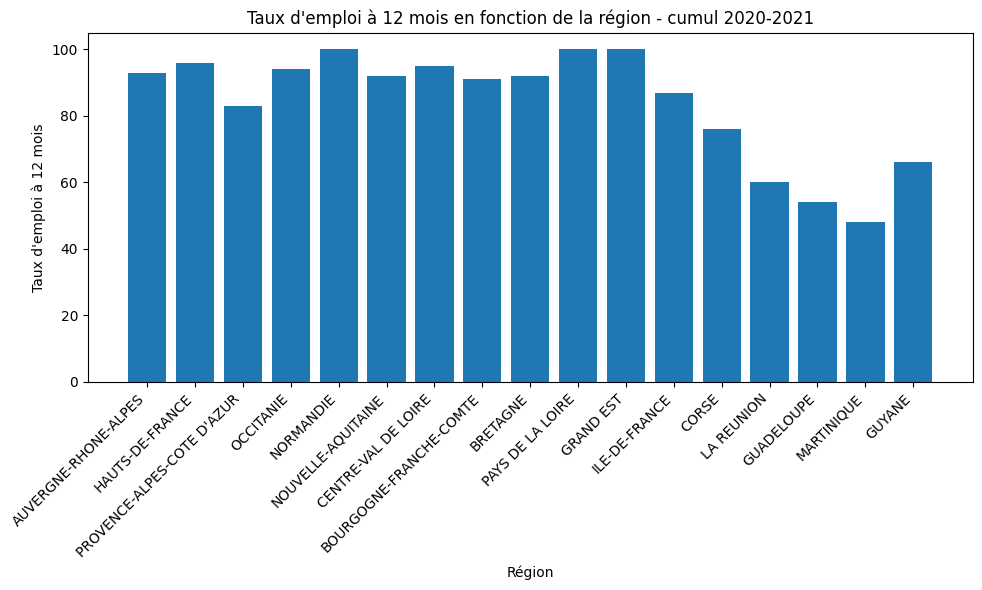

In [10]:
for periode in periodes:
    subset_data = data[data['annee'] == periode]
    
    plt.figure(figsize=(10, 6))
    plt.bar(subset_data['region'], subset_data['taux_emploi_12_mois'])
    plt.title(f"Taux d'emploi à 12 mois en fonction de la région - {periode}")
    plt.xlabel('Région')
    plt.ylabel('Taux d\'emploi à 12 mois')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

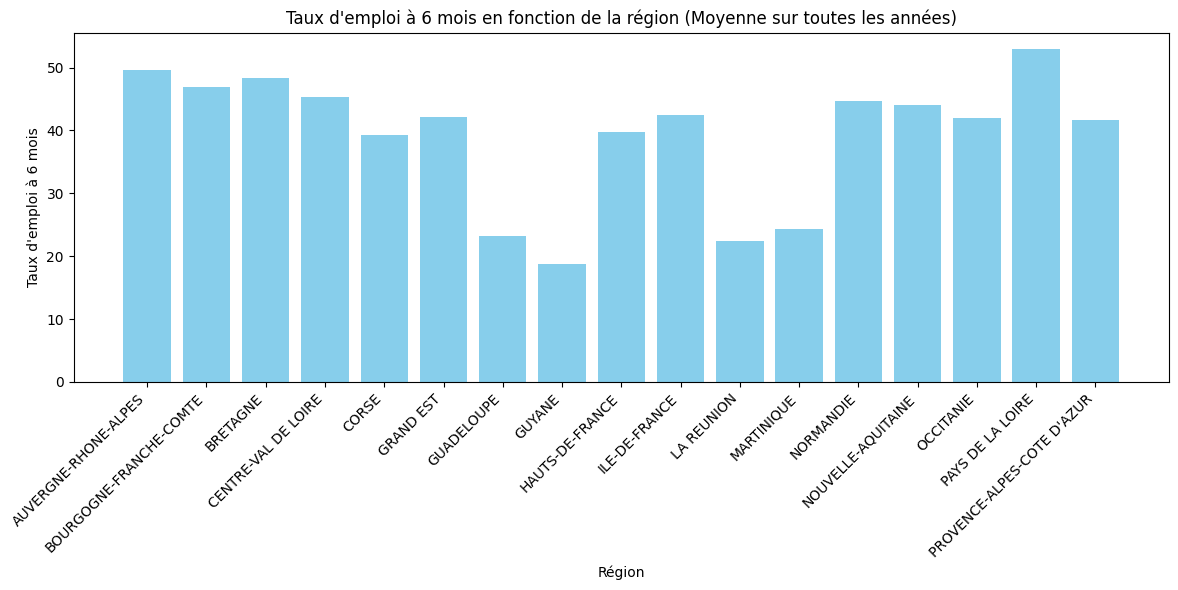

In [9]:
global_data = data.groupby('region')['taux_emploi_6_mois'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(global_data['region'], global_data['taux_emploi_6_mois'], color='skyblue')
plt.title('Taux d\'emploi à 6 mois en fonction de la région (Moyenne sur toutes les années)')
plt.xlabel('Région')
plt.ylabel('Taux d\'emploi à 6 mois')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()
plt.show()


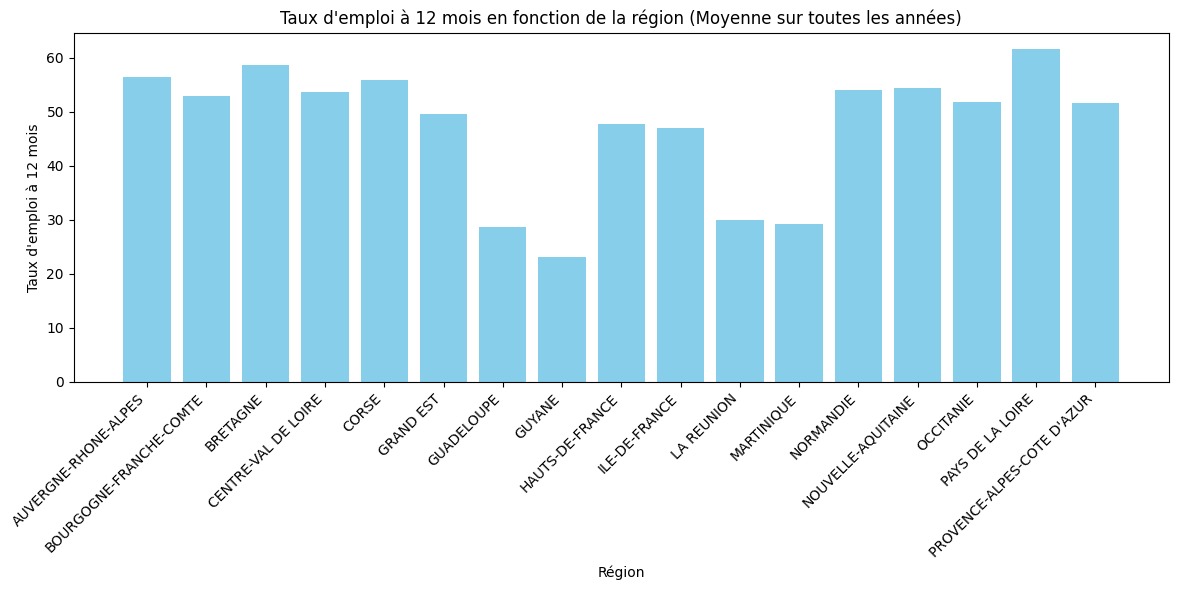

In [12]:
global_data = data.groupby('region')['taux_emploi_12_mois'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(global_data['region'], global_data['taux_emploi_12_mois'], color='skyblue')
plt.title('Taux d\'emploi à 12 mois en fonction de la région (Moyenne sur toutes les années)')
plt.xlabel('Région')
plt.ylabel('Taux d\'emploi à 12 mois')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()
plt.show()

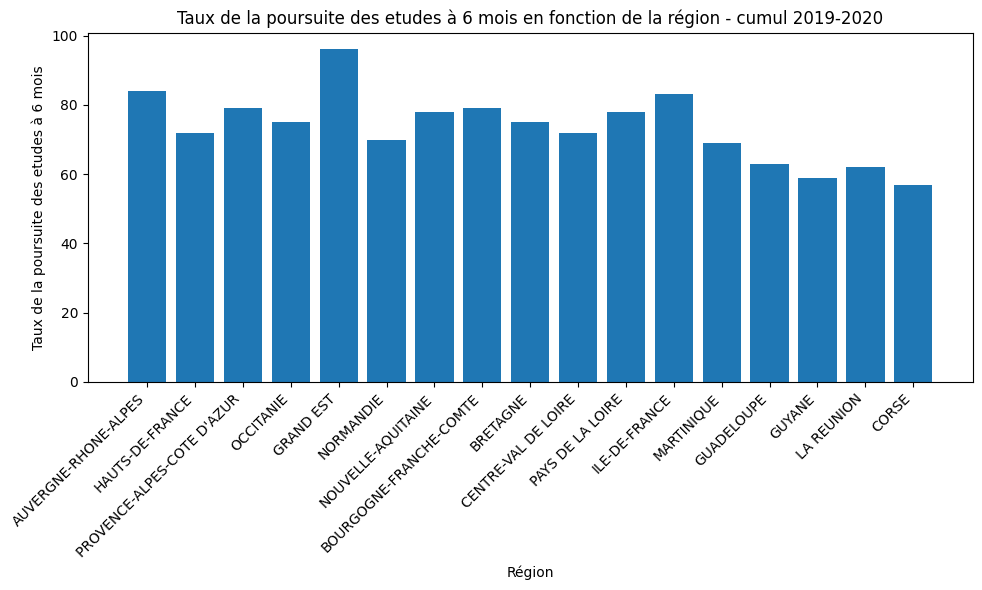

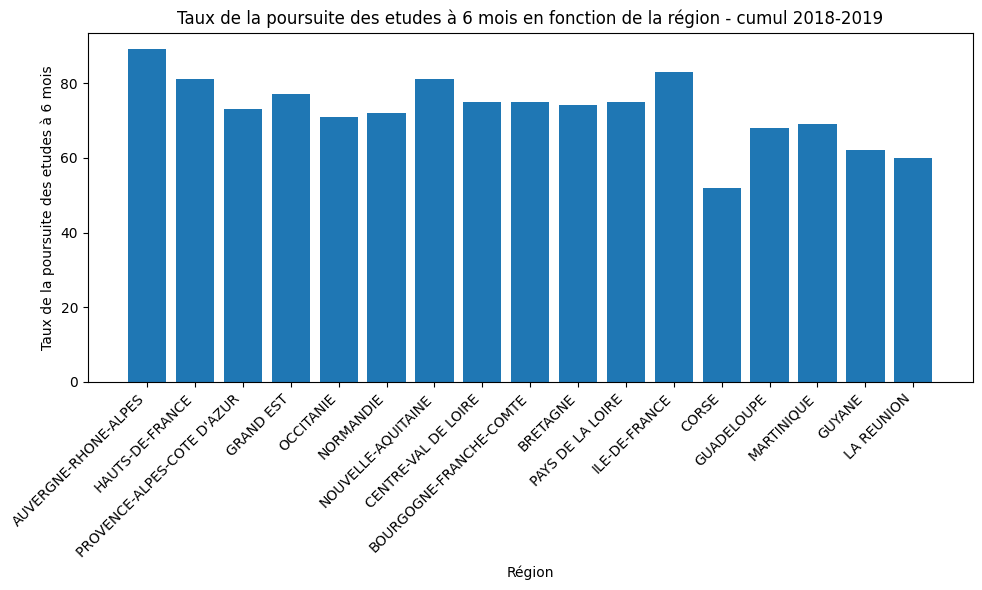

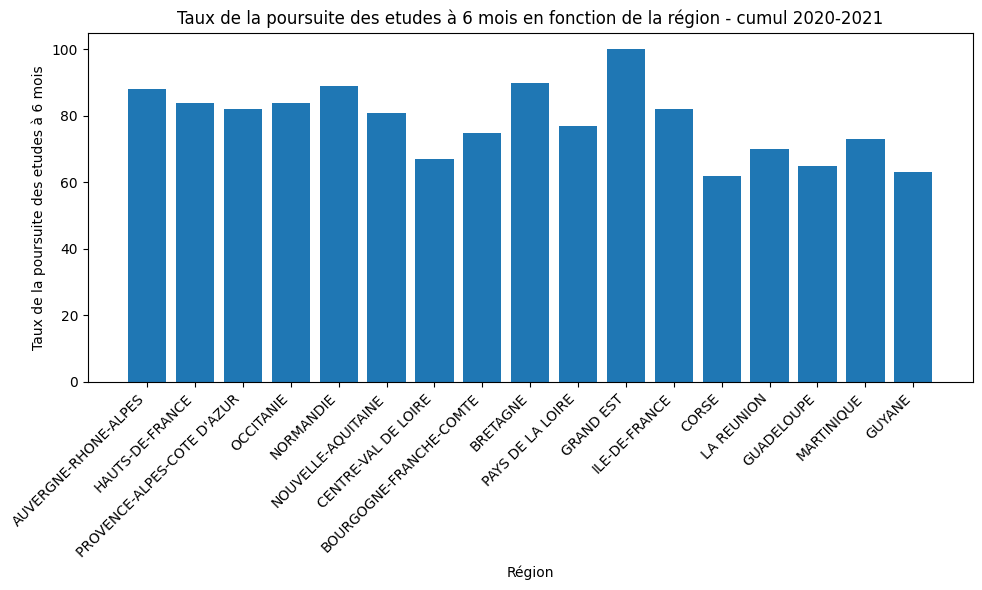

In [14]:
for periode in periodes:
    subset_data = data[data['annee'] == periode]
    
    plt.figure(figsize=(10, 6))
    plt.bar(subset_data['region'], subset_data['taux_poursuite_etudes'])
    plt.title(f"Taux de la poursuite des etudes à 6 mois en fonction de la région - {periode}")
    plt.xlabel('Région')
    plt.ylabel('Taux de la poursuite des etudes à 6 mois')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

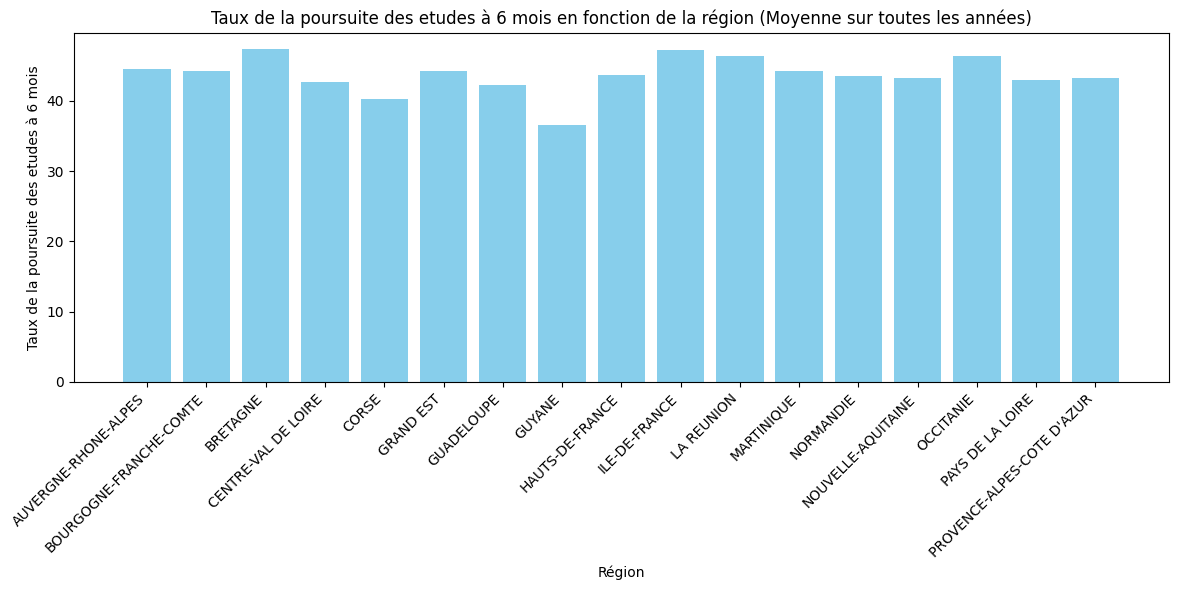

In [15]:
global_data = data.groupby('region')['taux_poursuite_etudes'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(global_data['region'], global_data['taux_poursuite_etudes'], color='skyblue')
plt.title('Taux de la poursuite des etudes à 6 mois en fonction de la région (Moyenne sur toutes les années)')
plt.xlabel('Région')
plt.ylabel('Taux de la poursuite des etudes à 6 mois')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()
plt.show()